In [1]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import os
import numpy as np
#from config import gkey
#import gmaps

In [2]:

final = pd.read_csv("AKUTTLER/final.csv")

In [3]:
final.head()

,Unnamed: 0,Unnamed: 0.1,STATE,COUNTY,# PHARMACIES,POPULATION,AVERAGE LIFE EXPECTANCY,PHARM CONCENTRATION (pop),CLASSIFICATION,LAND AREA (mi^2),PHARM CONCENTRATION (land),LAT,LNG
0,0,0,Texas,ANDERSON,12,57741,72.0,0.207825,Urban,1062.6,0.112931,34.552833,-82.648344
1,1,1,Texas,ANDREWS,5,17722,75.5,0.282135,Urban Cluster,1500.7,0.033318,32.342627,-102.713512
2,2,2,Texas,ANGELINA,27,87805,75.0,0.307500,Urban,797.8,0.338431,31.270470,-94.645035
3,3,3,Texas,ARANSAS,6,25572,75.2,0.234632,Urban Cluster,252.1,0.238001,28.076126,-96.963862
4,4,4,Texas,ARCHER,1,8809,75.8,0.113520,Urban Cluster,903.1,0.011073,33.576151,-98.748117


In [4]:
final['LAND AREA (mi^2)'].describe()

count     254.000000
mean     1028.477165
std       658.586730
min       127.000000
25%       835.675000
50%       908.700000
75%      1041.200000
max      6183.700000
Name: LAND AREA (mi^2), dtype: float64

In [5]:
#small cities are <25% mark, medium are between 25% and 75% mark and large are above 75% mark
bins = [ 127.000000, 835.675000, 1041.200000,6183.700000]
labels = ['Small', 'Medium', 'Large']

In [6]:
final['COUNTY SIZE'] = pd.cut(final['LAND AREA (mi^2)'], bins, labels=labels)


In [7]:
final.head()

,Unnamed: 0,Unnamed: 0.1,STATE,COUNTY,# PHARMACIES,POPULATION,AVERAGE LIFE EXPECTANCY,PHARM CONCENTRATION (pop),CLASSIFICATION,LAND AREA (mi^2),PHARM CONCENTRATION (land),LAT,LNG,COUNTY SIZE
0,0,0,Texas,ANDERSON,12,57741,72.0,0.207825,Urban,1062.6,0.112931,34.552833,-82.648344,Large
1,1,1,Texas,ANDREWS,5,17722,75.5,0.282135,Urban Cluster,1500.7,0.033318,32.342627,-102.713512,Large
2,2,2,Texas,ANGELINA,27,87805,75.0,0.307500,Urban,797.8,0.338431,31.270470,-94.645035,Small
3,3,3,Texas,ARANSAS,6,25572,75.2,0.234632,Urban Cluster,252.1,0.238001,28.076126,-96.963862,Small
4,4,4,Texas,ARCHER,1,8809,75.8,0.113520,Urban Cluster,903.1,0.011073,33.576151,-98.748117,Medium


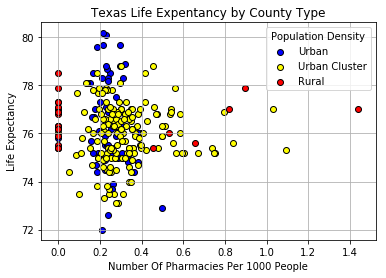

In [8]:
#Plot life expectancy by population
urban = final.loc[final["CLASSIFICATION"]=="Urban"]
urban_x = urban["PHARM CONCENTRATION (pop)"]
urban_y = urban["AVERAGE LIFE EXPECTANCY"]
plt.scatter(urban_x, urban_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "blue")

#plot urban clusters
urban_cluster = final.loc[final["CLASSIFICATION"]=="Urban Cluster"]
urban_cluster_x = urban_cluster["PHARM CONCENTRATION (pop)"]
urban_cluster_y = urban_cluster["AVERAGE LIFE EXPECTANCY"]
plt.scatter(urban_cluster_x, urban_cluster_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "yellow")

#plot rual
rural = final.loc[final["CLASSIFICATION"]=="Rural"]
rural_x = rural["PHARM CONCENTRATION (pop)"]
rural_y = rural["AVERAGE LIFE EXPECTANCY"]
plt.scatter(rural_x, rural_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "red")

plt.title("Texas Life Expentancy by County Type")
plt.xlabel("Number Of Pharmacies Per 1000 People")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend(final["CLASSIFICATION"].unique(), title = "Population Density")

plt.savefig("bubbleplotpop.png", bbox_inches="tight")
plt.show()

NameError: name 'line' is not defined

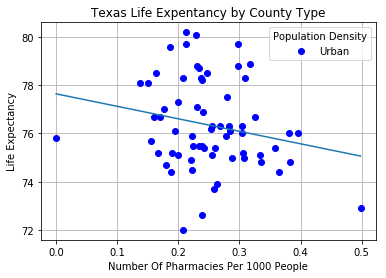

In [9]:
#plot urban
z1 = np.polyfit(urban_x, urban_y, 1)
p1 = np.poly1d(z1)
x_new = np.linspace(urban_x.min(), urban_x.max(), 1000)
y_new = p1(x_new)

plt.plot(urban_x, urban_y, "bo", x_new, y_new)

plt.title("Texas Life Expentancy by County Type")
plt.xlabel("Number Of Pharmacies Per 1000 People")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend(urban["CLASSIFICATION"].unique(), title = "Population Density")

line1 = str(round(p1[0], 2)) + " + " + str(round(p1[1], 5)) + "x"
plt.annotate("Equation of Fit:\n " + line,
             xy=(0.045,74),
             annotation_clip=False)


plt.savefig("plotpopurban.png", bbox_inches="tight")
plt.show()

In [ ]:
p

In [ ]:
#plot urban clusters
z2 = np.polyfit(urban_cluster_x, urban_cluster_y, 1)
p2 = np.poly1d(z2)
x_new = np.linspace(urban_cluster_x.min(), urban_cluster_x.max(), 1000)
y_new = p2(x_new)

plt.plot(urban_cluster_x, urban_cluster_y, "yo", x_new, y_new)

plt.title("Texas Life Expentancy by County Type")
plt.xlabel("Number Of Pharmacies Per 1000 People")
plt.ylabel("Life Expectancy by County")
plt.grid(True)
plt.legend(urban_cluster["CLASSIFICATION"].unique(), title = "Population Density")

line2 = str(round(p2[0], 2)) + " + " + str(round(p2[1], 2)) + "x"
plt.annotate("Equation of Fit:\n " + line2, 
             xy = (.5,74),
            annotation_clip=False)

plt.savefig("plotpopurbancluster.png", bbox_inches="tight")
plt.show()

In [ ]:
#plot rural
z3 = np.polyfit(rural_x,rural_y, 3)
p3 = np.poly1d(z3)
x_new = np.linspace(rural_x.min(), rural_x.max(), 1000)
y_new = p3(x_new)

plt.plot(rural_x, rural_y, "ro", x_new, y_new)

plt.title("Texas Life Expentancy by Population")
plt.xlabel("Population")
plt.ylabel("Life Expectancy by County")
plt.grid(True)
plt.legend(rural["CLASSIFICATION"].unique(), title = "Population Density")

line3 = str(round(p3[0], 2)) + " + " + str(round(p3[1], 2)) + "x3 " + str(round(p3[2], 2)) + "x2 " + str(round(p3[3], 2)) + "x"
plt.annotate("Equation of Fit:\n " + line3, 
             xy = (.2,78),
            annotation_clip=False)

plt.savefig("plotpoprural.png", bbox_inches="tight")
plt.show()

In [ ]:
#Plot # pharmacies
x_axis = final["# PHARMACIES"]
y_axis = final["AVERAGE LIFE EXPECTANCY"]
z7 = np.polyfit(x_axis, y_axis, 1)
p7 = np.poly1d(z7)
x_new = np.linspace(x_axis.min(), x_axis.max(), 1000)
y_new = p7(x_new)

plt.plot(x_axis, y_axis, "bo", x_new, y_new)


plt.title("Texas Life Expentancy by Pharmacy Count")
plt.xlabel("QTY Pharmacies")
plt.ylabel("Life Expectancy by County")
plt.grid(True)

line7 = str(round(p7[0], 2)) + " + " + str(round(p7[1], 2)) + "x"
plt.annotate("Equation of Fit:\n " + line7, 
             xy = (1000,78),
            annotation_clip=False)


plt.savefig("plotpharm.png", bbox_inches="tight")
plt.show()

In [ ]:
#Plot Land area

#Plot life expectancy for large county
large = final.loc[final["COUNTY SIZE"]=="Large"]
large_x = large["PHARM CONCENTRATION (land)"]
large_y = large["AVERAGE LIFE EXPECTANCY"]
plt.scatter(large_x, large_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "red")

#Plot life expectancy for medium county
med = final.loc[final["COUNTY SIZE"]=="Medium"]
med_x = med["PHARM CONCENTRATION (land)"]
med_y = med["AVERAGE LIFE EXPECTANCY"]
plt.scatter(med_x, med_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "yellow")

#Plot life expectancy for small county
small = final.loc[final["COUNTY SIZE"]=="Small"]
small_x = med["PHARM CONCENTRATION (land)"]
small_y = med["AVERAGE LIFE EXPECTANCY"]
plt.scatter(small_x, small_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "green")

plt.title("Texas Life Expentancy by Land Area")
plt.xlabel("Number of Pharmacies Per 10 Miles")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend(final["COUNTY SIZE"].unique(), title = "Population Density")


plt.savefig("plotland.png", bbox_inches="tight")
plt.show()

In [ ]:
 #plot large
z4 = np.polyfit(large_x,large_y, 1)
p4 = np.poly1d(z4)
x_new = np.linspace(large_x.min(), large_x.max(), 1000)
y_new = p4(x_new)

plt.plot(large_x, large_y, "ro", x_new, y_new)

plt.title("Texas Life Expentancy for Large Counties")
plt.xlabel("Number of Pharmacies Per 10 Miles")
plt.ylabel("Life Expectancy by County Size")
plt.grid(True)
plt.legend(large["COUNTY SIZE"].unique(), title = "County Size")

line4 = str(round(p4[0], 2)) + " + " + str(round(p4[1], 2)) + "x"
plt.annotate("Equation of Fit:\n " + line4, 
             xy = (4,78),
            annotation_clip=False)

plt.savefig("plotlarge.png", bbox_inches="tight")
plt.show()

In [ ]:
 #plot medium
z5 = np.polyfit(med_x,med_y, 1)
p5 = np.poly1d(z5)
x_new = np.linspace(med_x.min(), med_x.max(), 1000)
y_new = p5(x_new)

plt.plot(med_x, med_y, "yo", x_new, y_new)

plt.title("Texas Life Expentancy for Medium Counties")
plt.xlabel("Number of Pharmacies Per 10 Miles")
plt.ylabel("Life Expectancy by County")
plt.grid(True)
plt.legend(med["COUNTY SIZE"].unique(), title = "County Size")

line5 = str(round(p5[0], 2)) + " + " + str(round(p5[1], 2)) + "x"
plt.annotate("Equation of Fit:\n " + line5, 
             xy = (4,78),
            annotation_clip=False)

plt.savefig("plotmedium.png", bbox_inches="tight")
plt.show()

In [ ]:
#plot small
z6 = np.polyfit(small_x,small_y, 1)
p6 = np.poly1d(z6)
x_new = np.linspace(small_x.min(), small_x.max(), 1000)
y_new = p6(x_new)

plt.plot(small_x, small_y, "go", x_new, y_new)

plt.title("Texas Life Expentancy for Small Counties")
plt.xlabel("Number of Pharmacies Per 10 Miles")
plt.ylabel("Life Expectancy by County")
plt.grid(True)
plt.legend(small["COUNTY SIZE"].unique(), title = "County Size")

line6 = str(round(p6[0], 2)) + " + " + str(round(p6[1], 2)) + "x"
plt.annotate("Equation of Fit:\n " + line6, 
             xy = (5,78),
            annotation_clip=False)

plt.savefig("plotsmall.png", bbox_inches="tight")
plt.show()

In [ ]:
#plot rual
large_rural = final[(final["CLASSIFICATION"]=="Rural") & (final["COUNTY SIZE"]=="Large")]
large_rural_x = large_rural["# PHARMACIES"]
large_rural_y = large_rural["AVERAGE LIFE EXPECTANCY"]
plt.scatter(large_rural_x, large_rural_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "green")

plt.title("Texas Life Expentancy for Large, Rural Counties")
plt.xlabel("Number Of Pharmacies")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend(large_rural["CLASSIFICATION"].unique(), title = "Population Density")

#plt.savefig("bubbleplotpop.png", bbox_inches="tight")
plt.show()

In [ ]:
#plot rual
small_urban = final[(final["CLASSIFICATION"]=="Urban") & (final["COUNTY SIZE"]=="Small")]
small_urban_x = small_urban["# PHARMACIES"]
small_urban_y = small_urban["AVERAGE LIFE EXPECTANCY"]
plt.scatter(small_urban_x, small_urban_y,
           marker = "o",
           edgecolors = "black",
           facecolor = "red")

plt.title("Texas Life Expentancy for Small, Urban Counties")
plt.xlabel("Number Of Pharmacies")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend(small_urban["CLASSIFICATION"].unique(), title = "Population Density")

#plt.savefig("bubbleplotpop.png", bbox_inches="tight")
plt.show()